# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record


# Project Definition
### Project Overview
### Problem Statement
### Metrics

# Analysis

In [1]:
import pandas as pd
import numpy as np
import math
import json
%matplotlib inline

# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

### Data Exploration & Data Visualization

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

#### Portfolio Dataset

In [3]:
portfolio.shape

(10, 6)

In [4]:
portfolio.sort_values(by=['reward'])

,reward,channels,difficulty,duration,offer_type,id
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0


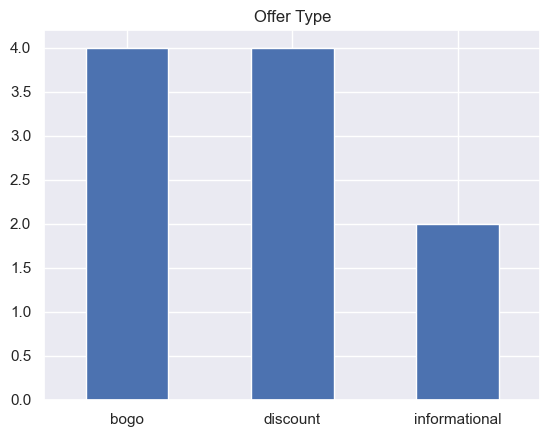

In [5]:
plt.subplot(111)
portfolio.offer_type.value_counts().plot.bar(rot=0)
plt.title('Offer Type');


Profolio dataset contains 10 records for 10 different offers from Starbucks and distribute into 3 type BOGO, Discount and Information.

The reward after completed the offer runs from 0 to 10 and also coresponse with the difficulty level.

#### Profile Dataset

In [6]:
profile.shape

(17000, 5)

In [7]:
profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [8]:
profile.describe()

,age,became_member_on,income
count,17000.000000,1.700000e+04,14825.000000
mean,62.531412,2.016703e+07,65404.991568
std,26.738580,1.167750e+04,21598.299410
min,18.000000,2.013073e+07,30000.000000
25%,45.000000,2.016053e+07,49000.000000
50%,58.000000,2.017080e+07,64000.000000
75%,73.000000,2.017123e+07,80000.000000
max,118.000000,2.018073e+07,120000.000000


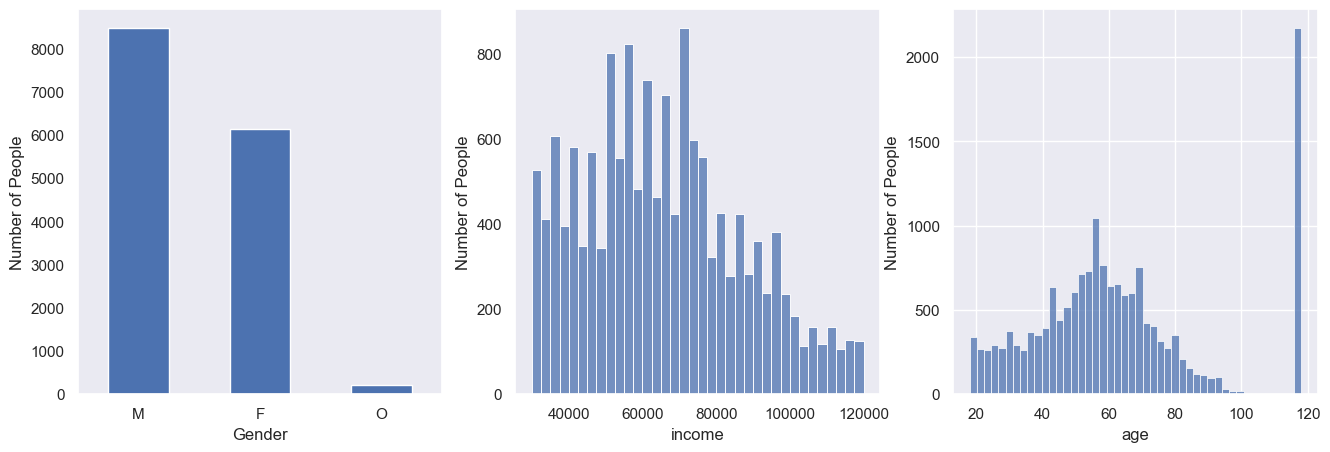

In [9]:
plt.figure(figsize=(16,5))

plt.subplot(131)
profile.gender.value_counts().plot(kind='bar', rot=0);
plt.ylabel('Number of People');
plt.xlabel('Gender');
plt.grid();

plt.subplot(132)
sns.histplot(data=profile, x="income")
plt.ylabel('Number of People');
plt.grid();

plt.subplot(133)
sns.histplot(data=profile, x="age")
plt.ylabel('Number of People');
plt.grid(True);


The profile dataset contains 17,000 entries, some of which have null values in the gender and income columns. 

The dashboard provides a visual representation of the distribution of members by gender, age, and income. The data shows that there are more male members than female, with a smaller population in the "other" category. 

The age group with the highest representation is between 50 and 70 years old. In terms of income, members with incomes ranging from 40k to 80k are the most common. 

In [42]:
len(profile[profile['age'] == 118])

2175

In [45]:
len(profile[profile['income'].isna()])

2175

Profile dataset needs to be cleaned as it contains null values and an age value of 118 that appears frequently due to a data entry error.

#### Transcript Dataset

In [10]:
transcript.shape

(306534, 4)

In [11]:
transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [69]:
transcript.isnull().any()

person    False
event     False
value     False
time      False
dtype: bool

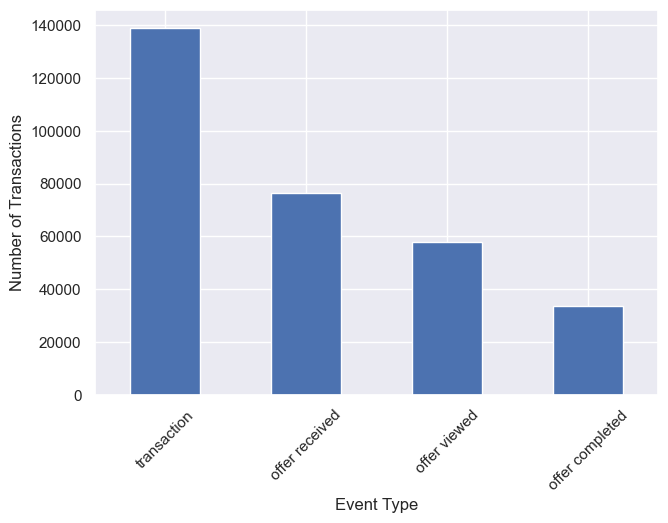

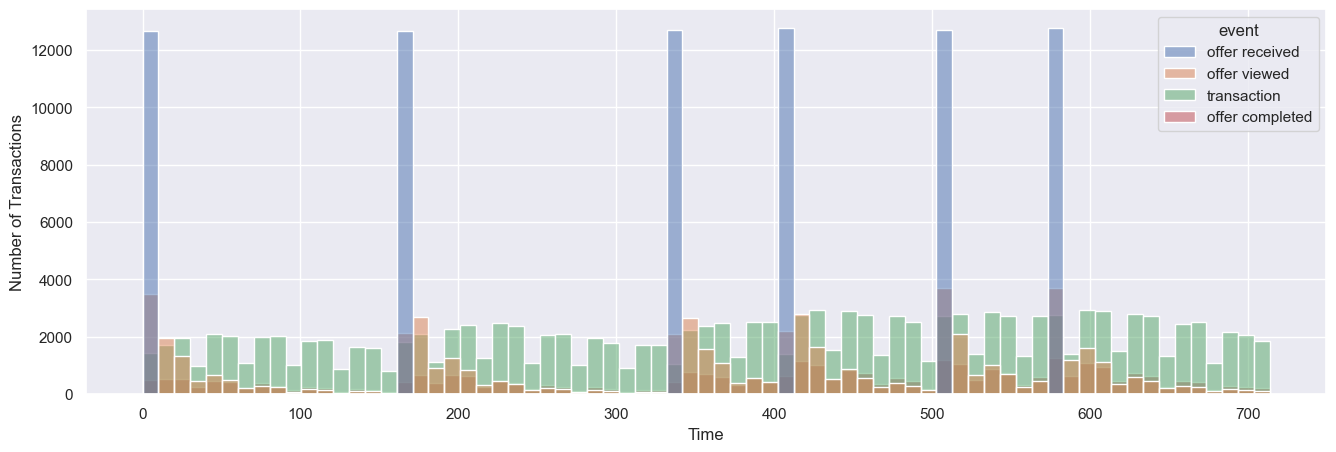

In [74]:
plt.figure(figsize=(16,5))

plt.subplot(121)
transcript.event.value_counts().plot.bar(rot=45);
plt.ylabel('Number of Transactions');
plt.xlabel('Event Type');
plt.grid(True);

plt.figure(figsize=(16,5))
sns.histplot(data=transcript, x="time", hue="event")
plt.ylabel('Number of Transactions');
plt.xlabel('Time');
plt.grid(True);

Transcript table consists 306534 records and does not contain null values but this table store "value" column in json format and we need to extract all the information for each type of event.

# Methodology

### Data Preprocessing
describe the steps taken to preprocess the data and address any abnormalities in the data sets. If data preprocessing is not needed, please explain why.

#### Porfolio Prepocessing

In [36]:
prepocessed_porfolio = portfolio.rename(columns={'id': 'offer_id'})

In [37]:
channels = prepocessed_porfolio['channels'].map(lambda x: ','.join(x)).str.get_dummies(',')
channels

,email,mobile,social,web
0,1,1,1,0
1,1,1,1,1
2,1,1,0,1
3,1,1,0,1
4,1,0,0,1
5,1,1,1,1
6,1,1,1,1
7,1,1,1,0
8,1,1,1,1
9,1,1,0,1


In [38]:
offer_type = pd.get_dummies(prepocessed_porfolio['offer_type'])
offer_type

,bogo,discount,informational
0,1,0,0
1,1,0,0
2,0,0,1
3,1,0,0
4,0,1,0
5,0,1,0
6,0,1,0
7,0,0,1
8,1,0,0
9,0,1,0


In [39]:
prepocessed_porfolio.drop(columns=['channels', 'offer_type'], inplace=True)
prepocessed_porfolio

,reward,difficulty,duration,offer_id
0,10,10,7,ae264e3637204a6fb9bb56bc8210ddfd
1,10,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,0,4,3f207df678b143eea3cee63160fa8bed
3,5,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,7,7,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,10,10,fafdcd668e3743c1bb461111dcafc2a4
7,0,0,3,5a8bc65990b245e5a138643cd4eb9837
8,5,5,5,f19421c1d4aa40978ebb69ca19b0e20d
9,2,10,7,2906b810c7d4411798c6938adc9daaa5


In [40]:
prepocessed_porfolio = pd.concat([prepocessed_porfolio, channels, offer_type], axis=1)
prepocessed_porfolio

,reward,difficulty,duration,offer_id,email,mobile,social,web,bogo,discount,informational
0,10,10,7,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0,1,0,0
1,10,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1,1,0,0
2,0,0,4,3f207df678b143eea3cee63160fa8bed,1,1,0,1,0,0,1
3,5,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1,1,0,0
4,5,20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,1,0,1,0
5,3,7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1,1,0,1,0
6,2,10,10,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1,0,1,0
7,0,0,3,5a8bc65990b245e5a138643cd4eb9837,1,1,1,0,0,0,1
8,5,5,5,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1,1,0,0
9,2,10,7,2906b810c7d4411798c6938adc9daaa5,1,1,0,1,0,1,0


#### Profile Prepocessing

As what I realized in the previous step, profile dataset contains 2175 records with age is 118 and income is null. Firstly, we will drop these records because they do not provide much information for our process.

In [76]:
invalid_profile_id = profile[profile.age == 118]['id']
invalid_profile_id

0        68be06ca386d4c31939f3a4f0e3dd783
2        38fe809add3b4fcf9315a9694bb96ff5
4        a03223e636434f42ac4c3df47e8bac43
6        8ec6ce2a7e7949b1bf142def7d0e0586
7        68617ca6246f4fbc85e91a2a49552598
                       ...               
16980    5c686d09ca4d475a8f750f2ba07e0440
16982    d9ca82f550ac4ee58b6299cf1e5c824a
16989    ca45ee1883624304bac1e4c8a114f045
16991    a9a20fa8b5504360beb4e7c8712f8306
16994    c02b10e8752c4d8e9b73f918558531f7
Name: id, Length: 2175, dtype: object

In [83]:
prepocessed_profile = profile[profile.age != 118]
prepocessed_profile

,gender,age,id,became_member_on,income
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
5,M,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0
8,M,65,389bc3fa690240e798340f5a15918d5c,20180209,53000.0
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,20171111,51000.0
...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0
16997,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0


In [53]:
prepocessed_profile.isnull().any()

gender              False
age                 False
id                  False
became_member_on    False
income              False
dtype: bool

After dropping, 118 years old profiles we also get rid of null values in profile dataset.

In [84]:
prepocessed_profile = prepocessed_profile.rename(columns={'id': 'person_id'})

In [85]:
gender = pd.get_dummies(prepocessed_profile['gender'])
gender.rename(columns={'F': 'Female', 'M': 'Male', 'O': 'Other'}, inplace=True)
gender

,Female,Male,Other
1,1,0,0
3,1,0,0
5,0,1,0
8,0,1,0
12,0,1,0
...,...,...,...
16995,1,0,0
16996,0,1,0
16997,0,1,0
16998,1,0,0


In [86]:
prepocessed_profile['became_member_on'] = pd.to_datetime(prepocessed_profile['became_member_on'],format='%Y%m%d')
prepocessed_profile

,gender,age,person_id,became_member_on,income
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0
5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0
8,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0
...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,2018-06-04,54000.0
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,2018-07-13,72000.0
16997,M,49,01d26f638c274aa0b965d24cefe3183f,2017-01-26,73000.0
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,2016-03-07,50000.0


In [87]:
from datetime import datetime

now = datetime.now()
prepocessed_profile['membership_days'] = (now - prepocessed_profile['became_member_on']).dt.days
prepocessed_profile

,gender,age,person_id,became_member_on,income,membership_days
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,2152
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,2219
5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0,1867
8,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0,1943
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0,2033
...,...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,2018-06-04,54000.0,1828
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,2018-07-13,72000.0,1789
16997,M,49,01d26f638c274aa0b965d24cefe3183f,2017-01-26,73000.0,2322
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,2016-03-07,50000.0,2647


In [88]:
prepocessed_profile.drop(columns=['became_member_on', 'gender'], axis=1, inplace=True)


In [89]:
prepocessed_profile = pd.concat([prepocessed_profile, gender], axis=1)
prepocessed_profile

,age,person_id,income,membership_days,Female,Male,Other
1,55,0610b486422d4921ae7d2bf64640c50b,112000.0,2152,1,0,0
3,75,78afa995795e4d85b5d9ceeca43f5fef,100000.0,2219,1,0,0
5,68,e2127556f4f64592b11af22de27a7932,70000.0,1867,0,1,0
8,65,389bc3fa690240e798340f5a15918d5c,53000.0,1943,0,1,0
12,58,2eeac8d8feae4a8cad5a6af0499a211d,51000.0,2033,0,1,0
...,...,...,...,...,...,...,...
16995,45,6d5f3a774f3d4714ab0c092238f3a1d7,54000.0,1828,1,0,0
16996,61,2cb4f97358b841b9a9773a7aa05a9d77,72000.0,1789,0,1,0
16997,49,01d26f638c274aa0b965d24cefe3183f,73000.0,2322,0,1,0
16998,83,9dc1421481194dcd9400aec7c9ae6366,50000.0,2647,1,0,0


#### Transript Preprocessing

In [90]:
prepocessed_transcript = transcript[~transcript.person.isin(invalid_profile_id)]
prepocessed_transcript

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
5,389bc3fa690240e798340f5a15918d5c,offer received,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},0
7,2eeac8d8feae4a8cad5a6af0499a211d,offer received,{'offer id': '3f207df678b143eea3cee63160fa8bed'},0
8,aa4862eba776480b8bb9c68455b8c2e1,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
...,...,...,...,...
306527,24f56b5e1849462093931b164eb803b5,offer completed,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...,714
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714


In [91]:
prepocessed_transcript = prepocessed_transcript.rename(columns={'person': 'person_id'})

In [96]:
event_type = pd.get_dummies(prepocessed_transcript['event']);
event_type.rename(columns={'offer completed': 'offer_completed', 'offer received': 'offer_received', 'offer viewed': 'offer_viewed'}, inplace=True)
event_type

,offer_completed,offer_received,offer_viewed,transaction
0,0,1,0,0
2,0,1,0,0
5,0,1,0,0
7,0,1,0,0
8,0,1,0,0
...,...,...,...,...
306527,1,0,0,0
306529,0,0,0,1
306530,0,0,0,1
306531,0,0,0,1


In [97]:
prepocessed_transcript.drop(columns=["event"], inplace=True)
prepocessed_transcript = pd.concat([prepocessed_transcript, event_type], axis=1)
prepocessed_transcript

,person_id,value,time,offer_completed,offer_received,offer_viewed,transaction
0,78afa995795e4d85b5d9ceeca43f5fef,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,0,1,0,0
2,e2127556f4f64592b11af22de27a7932,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,0,1,0,0
5,389bc3fa690240e798340f5a15918d5c,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},0,0,1,0,0
7,2eeac8d8feae4a8cad5a6af0499a211d,{'offer id': '3f207df678b143eea3cee63160fa8bed'},0,0,1,0,0
8,aa4862eba776480b8bb9c68455b8c2e1,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,0,1,0,0
...,...,...,...,...,...,...,...
306527,24f56b5e1849462093931b164eb803b5,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...,714,1,0,0,0
306529,b3a1272bc9904337b331bf348c3e8c17,{'amount': 1.5899999999999999},714,0,0,0,1
306530,68213b08d99a4ae1b0dcb72aebd9aa35,{'amount': 9.53},714,0,0,0,1
306531,a00058cf10334a308c68e7631c529907,{'amount': 3.61},714,0,0,0,1


For investigating more about offer interaction, we take only event offer_completed, offer_received, offer_viewed for analytic and then parse value column to get offer_id

In [117]:
prepocessed_transcript_offer_received = prepocessed_transcript[prepocessed_transcript['offer_received'] == 1].drop(columns=["offer_completed", "offer_viewed", "transaction"])
prepocessed_transcript_offer_received['offer_id'] = prepocessed_transcript_offer_received['value'].apply(lambda x: x['offer id'])
prepocessed_transcript_offer_received.drop(columns=["value"], inplace=True)
prepocessed_transcript_offer_received.rename(columns={'time': 'offer_received_time'}, inplace=True)
prepocessed_transcript_offer_received

,person_id,offer_received_time,offer_received,offer_id
0,78afa995795e4d85b5d9ceeca43f5fef,0,1,9b98b8c7a33c4b65b9aebfe6a799e6d9
2,e2127556f4f64592b11af22de27a7932,0,1,2906b810c7d4411798c6938adc9daaa5
5,389bc3fa690240e798340f5a15918d5c,0,1,f19421c1d4aa40978ebb69ca19b0e20d
7,2eeac8d8feae4a8cad5a6af0499a211d,0,1,3f207df678b143eea3cee63160fa8bed
8,aa4862eba776480b8bb9c68455b8c2e1,0,1,0b1e1539f2cc45b7b9fa7c272da2e1d7
...,...,...,...,...
257882,d087c473b4d247ccb0abfef59ba12b0e,576,1,ae264e3637204a6fb9bb56bc8210ddfd
257883,cb23b66c56f64b109d673d5e56574529,576,1,2906b810c7d4411798c6938adc9daaa5
257884,6d5f3a774f3d4714ab0c092238f3a1d7,576,1,2298d6c36e964ae4a3e7e9706d1fb8c2
257885,9dc1421481194dcd9400aec7c9ae6366,576,1,ae264e3637204a6fb9bb56bc8210ddfd


In [118]:
prepocessed_transcript_offer_viewed = prepocessed_transcript[prepocessed_transcript['offer_viewed'] == 1].drop(columns=["offer_completed", "offer_received", "transaction"])
prepocessed_transcript_offer_viewed['offer_id'] = prepocessed_transcript_offer_viewed['value'].apply(lambda x: x['offer id'])
prepocessed_transcript_offer_viewed.drop(columns=["value"], inplace=True)
prepocessed_transcript_offer_viewed.rename(columns={'time': 'offer_viewed_time'}, inplace=True)
prepocessed_transcript_offer_viewed

,person_id,offer_viewed_time,offer_viewed,offer_id
12650,389bc3fa690240e798340f5a15918d5c,0,1,f19421c1d4aa40978ebb69ca19b0e20d
12651,d1ede868e29245ea91818a903fec04c6,0,1,5a8bc65990b245e5a138643cd4eb9837
12652,102e9454054946fda62242d2e176fdce,0,1,4d5c57ea9a6940dd891ad53e9dbe8da0
12653,02c083884c7d45b39cc68e1314fec56c,0,1,ae264e3637204a6fb9bb56bc8210ddfd
12655,be8a5d1981a2458d90b255ddc7e0d174,0,1,5a8bc65990b245e5a138643cd4eb9837
...,...,...,...,...
306433,ec1761735b034ae8874bc979f0cd5862,714,1,5a8bc65990b245e5a138643cd4eb9837
306450,9b51e8797290403b90d09d864dec4b94,714,1,3f207df678b143eea3cee63160fa8bed
306483,84fb57a7fe8045a8bf6236738ee73a0f,714,1,5a8bc65990b245e5a138643cd4eb9837
306490,abc4359eb34e4e2ca2349da2ddf771b6,714,1,3f207df678b143eea3cee63160fa8bed


In [119]:
prepocessed_transcript_offer_completed = prepocessed_transcript[prepocessed_transcript['offer_completed'] == 1]\
                                            .drop(columns=["offer_viewed", "offer_received", "transaction"])
prepocessed_transcript_offer_completed['offer_id'] = prepocessed_transcript_offer_completed['value'].apply(lambda x: x['offer_id'])
prepocessed_transcript_offer_completed['transcript_reward'] = prepocessed_transcript_offer_completed['value'].apply(lambda x: x['reward'])
prepocessed_transcript_offer_completed.drop(columns=["value"], inplace=True)
prepocessed_transcript_offer_completed.rename(columns={'time': 'offer_completed_time'}, inplace=True)
prepocessed_transcript_offer_completed

,person_id,offer_completed_time,offer_completed,offer_id,transcript_reward
12658,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,0,1,2906b810c7d4411798c6938adc9daaa5,2
12672,fe97aa22dd3e48c8b143116a8403dd52,0,1,fafdcd668e3743c1bb461111dcafc2a4,2
12679,629fc02d56414d91bca360decdfa9288,0,1,9b98b8c7a33c4b65b9aebfe6a799e6d9,5
12692,676506bad68e4161b9bbaffeb039626b,0,1,ae264e3637204a6fb9bb56bc8210ddfd,10
12697,8f7dd3b2afe14c078eb4f6e6fe4ba97d,0,1,4d5c57ea9a6940dd891ad53e9dbe8da0,10
...,...,...,...,...,...
306456,f3e801caeafe4899b3b989b586e74ac7,714,1,0b1e1539f2cc45b7b9fa7c272da2e1d7,5
306470,452cdae2c68e4732a4177d3929562690,714,1,fafdcd668e3743c1bb461111dcafc2a4,2
306475,0c027f5f34dd4b9eba0a25785c611273,714,1,2298d6c36e964ae4a3e7e9706d1fb8c2,3
306509,8431c16f8e1d440880db371a68f82dd0,714,1,fafdcd668e3743c1bb461111dcafc2a4,2


272762 102693 

In [122]:
272762-102693 

170069

In [127]:
tmp_df = pd.merge(prepocessed_transcript_offer_received, prepocessed_transcript_offer_viewed, on=['person_id', 'offer_id'], how='outer')
prepocessed_transcript_offer = pd.merge(tmp_df, prepocessed_transcript_offer_completed, on=['person_id', 'offer_id'], how='outer')
prepocessed_transcript_offer

,person_id,offer_received_time,offer_received,offer_id,offer_viewed_time,offer_viewed,offer_completed_time,offer_completed,transcript_reward
0,78afa995795e4d85b5d9ceeca43f5fef,0,1,9b98b8c7a33c4b65b9aebfe6a799e6d9,6.0,1.0,132.0,1.0,5.0
1,e2127556f4f64592b11af22de27a7932,0,1,2906b810c7d4411798c6938adc9daaa5,18.0,1.0,NaN,NaN,NaN
2,389bc3fa690240e798340f5a15918d5c,0,1,f19421c1d4aa40978ebb69ca19b0e20d,0.0,1.0,60.0,1.0,5.0
3,389bc3fa690240e798340f5a15918d5c,0,1,f19421c1d4aa40978ebb69ca19b0e20d,0.0,1.0,600.0,1.0,5.0
4,389bc3fa690240e798340f5a15918d5c,0,1,f19421c1d4aa40978ebb69ca19b0e20d,504.0,1.0,60.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...
102688,670626b55bfb4ba39c85b27cc7cca527,576,1,0b1e1539f2cc45b7b9fa7c272da2e1d7,624.0,1.0,666.0,1.0,5.0
102689,a57890c3bbb7463e9018abb7fecadb15,576,1,5a8bc65990b245e5a138643cd4eb9837,576.0,1.0,NaN,NaN,NaN
102690,d087c473b4d247ccb0abfef59ba12b0e,576,1,ae264e3637204a6fb9bb56bc8210ddfd,672.0,1.0,636.0,1.0,10.0
102691,6d5f3a774f3d4714ab0c092238f3a1d7,576,1,2298d6c36e964ae4a3e7e9706d1fb8c2,588.0,1.0,NaN,NaN,NaN


In [128]:
prepocessed_transcript_offer[['offer_received','offer_viewed', 'offer_completed']] = prepocessed_transcript_offer[['offer_received','offer_viewed', 'offer_completed']].fillna(0)

prepocessed_transcript_offer.drop(columns=['offer_viewed_time', 'offer_completed_time', 'transcript_reward'], inplace=True)
prepocessed_transcript_offer

,person_id,offer_received_time,offer_received,offer_id,offer_viewed,offer_completed
0,78afa995795e4d85b5d9ceeca43f5fef,0,1,9b98b8c7a33c4b65b9aebfe6a799e6d9,1.0,1.0
1,e2127556f4f64592b11af22de27a7932,0,1,2906b810c7d4411798c6938adc9daaa5,1.0,0.0
2,389bc3fa690240e798340f5a15918d5c,0,1,f19421c1d4aa40978ebb69ca19b0e20d,1.0,1.0
3,389bc3fa690240e798340f5a15918d5c,0,1,f19421c1d4aa40978ebb69ca19b0e20d,1.0,1.0
4,389bc3fa690240e798340f5a15918d5c,0,1,f19421c1d4aa40978ebb69ca19b0e20d,1.0,1.0
...,...,...,...,...,...,...
102688,670626b55bfb4ba39c85b27cc7cca527,576,1,0b1e1539f2cc45b7b9fa7c272da2e1d7,1.0,1.0
102689,a57890c3bbb7463e9018abb7fecadb15,576,1,5a8bc65990b245e5a138643cd4eb9837,1.0,0.0
102690,d087c473b4d247ccb0abfef59ba12b0e,576,1,ae264e3637204a6fb9bb56bc8210ddfd,1.0,1.0
102691,6d5f3a774f3d4714ab0c092238f3a1d7,576,1,2298d6c36e964ae4a3e7e9706d1fb8c2,1.0,0.0


In [125]:
prepocessed_transcript_offer

,person_id,offer_received_time,offer_received,offer_id,offer_viewed_time,offer_viewed,offer_completed_time,offer_completed,transcript_reward
0,78afa995795e4d85b5d9ceeca43f5fef,0,1,9b98b8c7a33c4b65b9aebfe6a799e6d9,6.0,1.0,132.0,1.0,5.0
1,e2127556f4f64592b11af22de27a7932,0,1,2906b810c7d4411798c6938adc9daaa5,18.0,1.0,NaN,0.0,NaN
2,389bc3fa690240e798340f5a15918d5c,0,1,f19421c1d4aa40978ebb69ca19b0e20d,0.0,1.0,60.0,1.0,5.0
3,389bc3fa690240e798340f5a15918d5c,0,1,f19421c1d4aa40978ebb69ca19b0e20d,0.0,1.0,600.0,1.0,5.0
4,389bc3fa690240e798340f5a15918d5c,0,1,f19421c1d4aa40978ebb69ca19b0e20d,504.0,1.0,60.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...
102688,670626b55bfb4ba39c85b27cc7cca527,576,1,0b1e1539f2cc45b7b9fa7c272da2e1d7,624.0,1.0,666.0,1.0,5.0
102689,a57890c3bbb7463e9018abb7fecadb15,576,1,5a8bc65990b245e5a138643cd4eb9837,576.0,1.0,NaN,0.0,NaN
102690,d087c473b4d247ccb0abfef59ba12b0e,576,1,ae264e3637204a6fb9bb56bc8210ddfd,672.0,1.0,636.0,1.0,10.0
102691,6d5f3a774f3d4714ab0c092238f3a1d7,576,1,2298d6c36e964ae4a3e7e9706d1fb8c2,588.0,1.0,NaN,0.0,NaN


### Implementation
discuss the process using the models, algorithms, and techniques applied to solve the problem. Any complications during the implementation should be mentioned.

### Refinement
describe the process to refine the algorithms and techniques, such as using cross-validation or changing the parameter settings.

# Results

### Model Evaluation and Validation
discuss the models and parameters used in the methodology. If no model is used, students can discuss the methodology using data visualizations and other means.

### Justification
discuss the final results in detail and explain why some models, parameters, or techniques perform better over others. Show and compare the results in tabular forms or charts.

# Conclusion

### Reflection
summarize the end-to-end problem solution and discuss one or two particular aspects that you find interesting or difficult to implement.

### Improvement
provide suggestions for the next research to improve the experiment.